In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

df = pd.read_excel('datatran2017_2018.xlsx')
print(df.columns)

Index(['id_0', 'id', 'data_inversa', 'dia_semana', 'mês', 'horario', 'uf',
       'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'layer', 'path'],
      dtype='object')


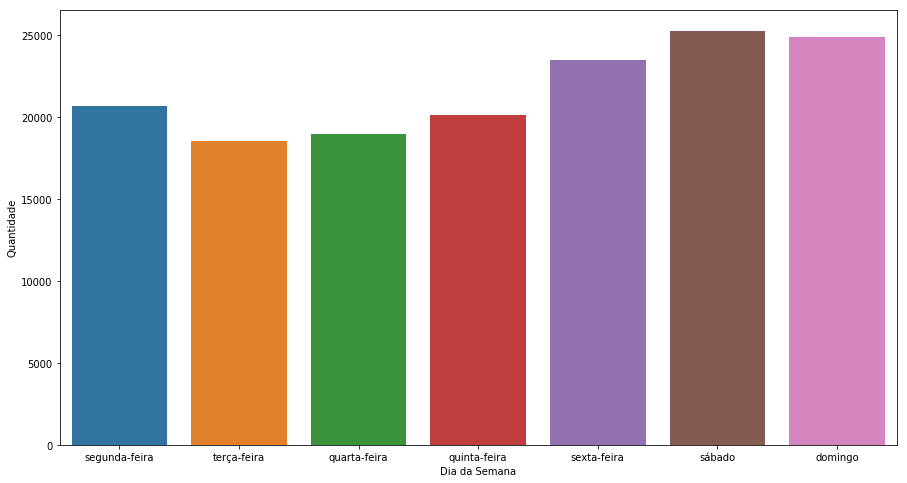

In [2]:
plt.figure(figsize=(15,8))
sns.countplot(x='dia_semana', order = ['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo'], data = df)
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.show()

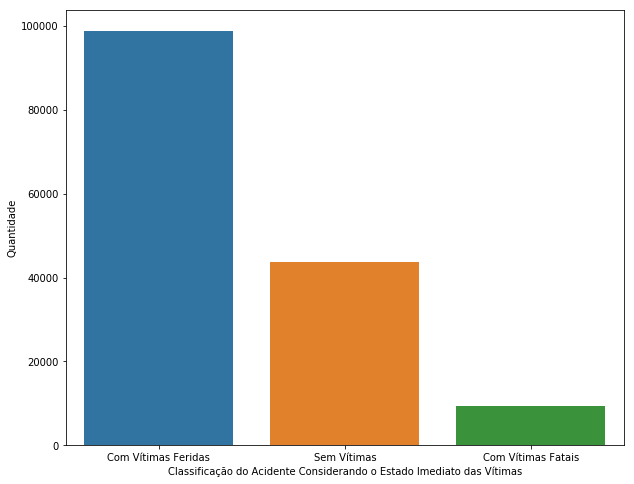

In [3]:
plt.figure(figsize=(10,8))
sns.countplot(x='classificacao_acidente', data = df)
plt.xlabel('Classificação do Acidente Considerando o Estado Imediato das Vítimas')
plt.ylabel('Quantidade')
plt.show()

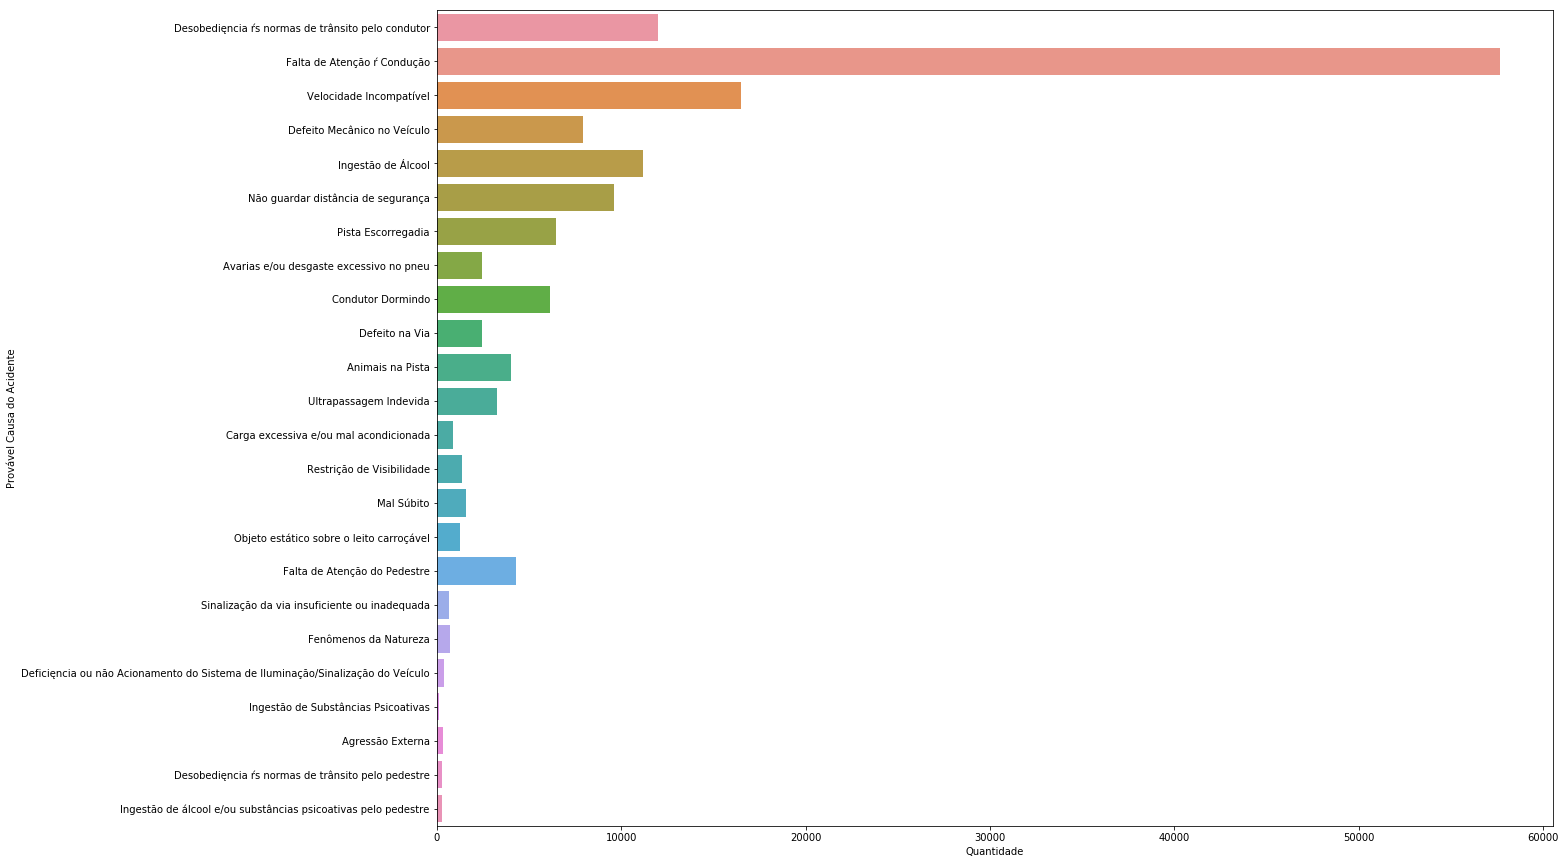

In [26]:
plt.figure(figsize=(20,15))
sns.countplot(y='causa_acidente', data = df)
plt.xlabel('Quantidade')
plt.ylabel('Provável Causa do Acidente')
plt.show()

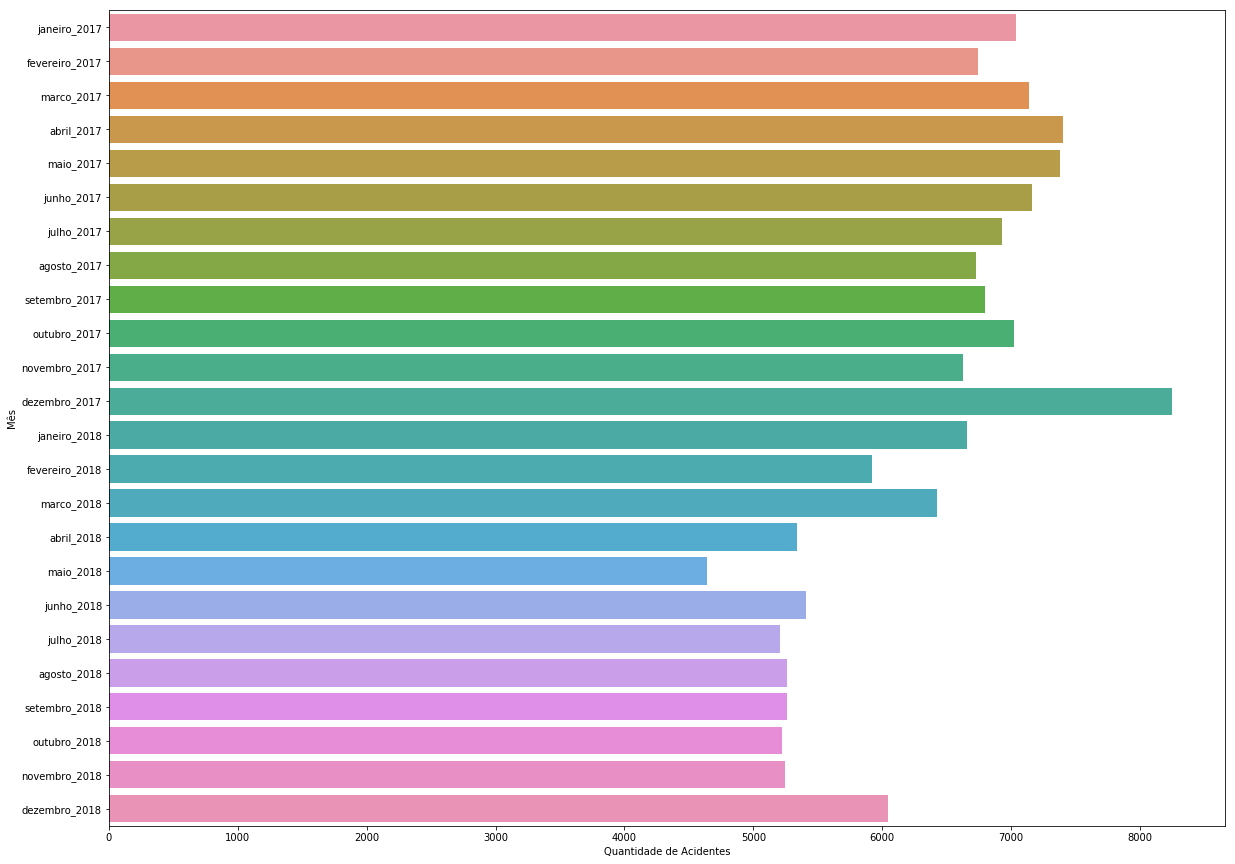

In [2]:
plt.figure(figsize=(20,15))
sns.countplot(y = 'mês', data = df)
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Mês')
plt.show()

In [6]:
gdf = gpd.read_file('datatran2017_2018_new.geojson')
gdf.head()

,id_0,id,data_inversa,dia_semana,mês,horario,uf,br,km,municipio,...,feridos,veiculos,latitude,longitude,regional,delegacia,uop,layer,path,geometry
0,14403,15,2017-01-01,domingo,janeiro_2017,00:01:00,PB,104,3,NOVA FLORESTA,...,0,1,-6.462200,-36.189900,SR-PB,DEL14/2,UOP04/PB,datatran2017,dbname='analise_vias' host=localhost port=5432...,POINT (-36.1899 -6.4622)
1,14404,130,2017-01-01,domingo,janeiro_2017,10:30:00,PA,222,243,MARABA,...,1,1,-5.325705,-49.086270,SR-PA,DEL19/3,UOP01/PA,datatran2017,dbname='analise_vias' host=localhost port=5432...,POINT (-49.08627033 -5.3257047)
2,14405,258,2017-01-01,domingo,janeiro_2017,18:30:00,PB,101,17,MAMANGUAPE,...,1,1,-6.642703,-35.122427,SR-PB,DEL14/1,UOP04/PB,datatran2017,dbname='analise_vias' host=localhost port=5432...,POINT (-35.12242734 -6.64270297)
3,14406,279,2017-01-01,domingo,janeiro_2017,19:35:00,PE,104,48,CARUARU,...,1,1,-8.138332,-35.989582,SR-PE,DEL11/2,UOP01/PE,datatran2017,dbname='analise_vias' host=localhost port=5432...,POINT (-35.98958157 -8.138331539999999)
4,14407,292,2017-01-01,domingo,janeiro_2017,17:50:00,SC,282,466,PONTE SERRADA,...,1,2,-26.853326,-52.062879,SR-SC,DEL8/7,UOP03/SC,datatran2017,dbname='analise_vias' host=localhost port=5432...,POINT (-52.06287861 -26.85332629)


<Figure size 1440x1080 with 0 Axes>

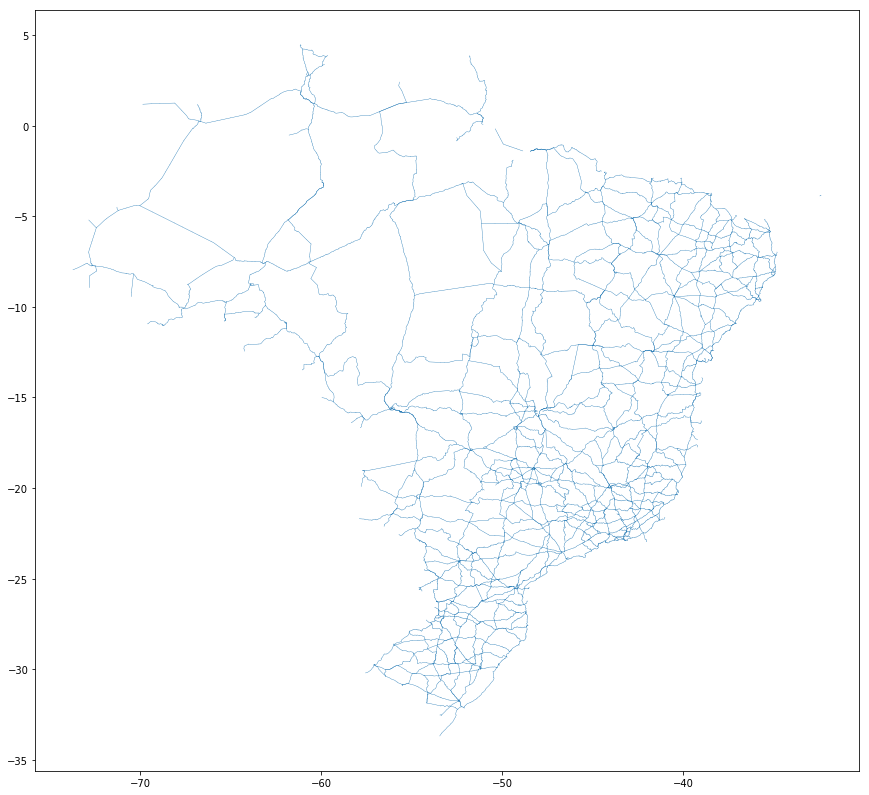

In [19]:
estradas = gpd.read_file('DNIT_Rodovias.geojson')
buffer_estradas = estradas.buffer(0.01)
plt.figure(figsize=(20,15))
buffer_estradas.plot(figsize=(16,14))

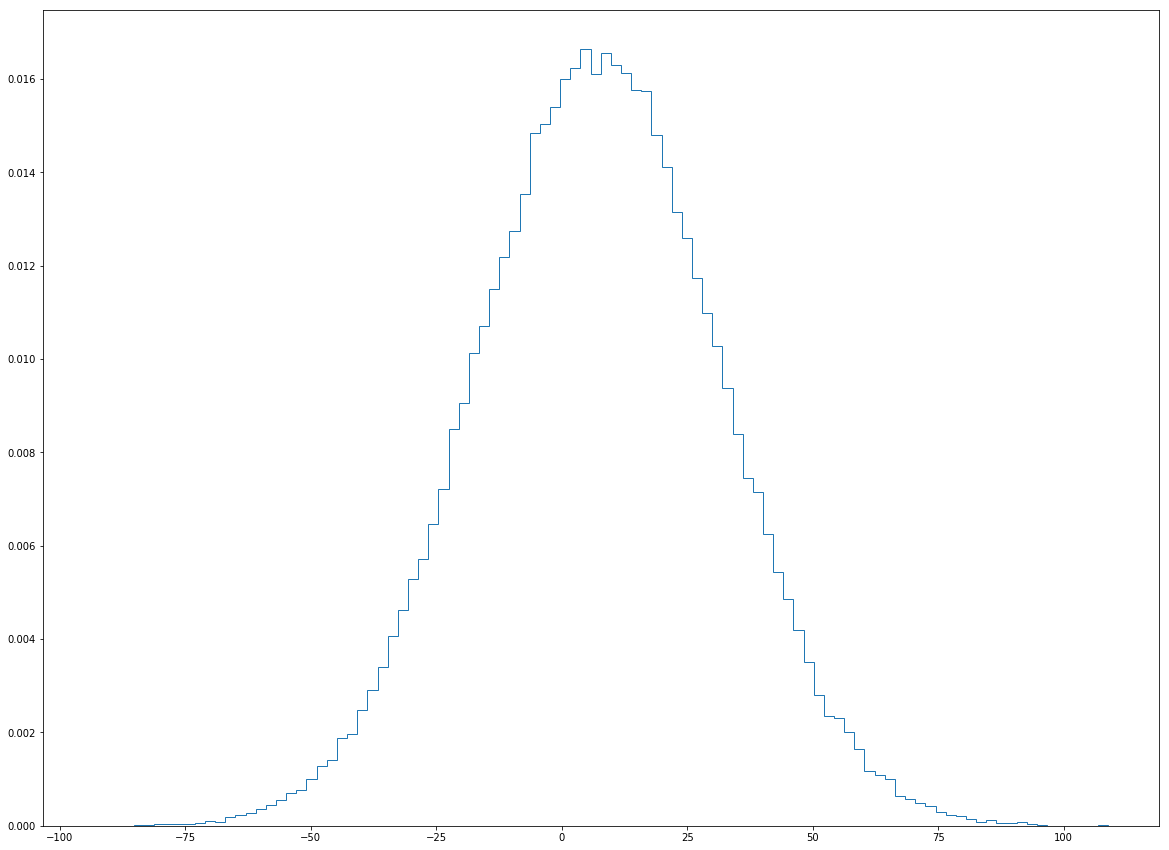

In [4]:
#acidentes a cada 10km para os dois anos
#calcular -2omega e +2omega para se verificar o intervalo de confiança (95%)
#mostrar casos de sucesso e casos de falha
#classificar mapa coroplético com o número de acidentes no folium
#identificar correlação dos acidentes com o campo ds_legenda (informa se estrada é duplicada ou não etc)

estradas = gpd.read_file('DNIT_Rodovias_cont.geojson')
estradas.loc[estradas['ds_legenda'] == 'Duplicada','coef_seg_inf'] = 10
estradas.loc[estradas['ds_legenda'] == 'Pavimentada','coef_seg_inf'] = 30
estradas.loc[estradas['ds_legenda'] == 'Em obra de Duplicação','coef_seg_inf'] = 30
estradas.loc[estradas['ds_legenda'] == 'Planejada','coef_seg_inf'] = 50
estradas.loc[estradas['ds_legenda'] == 'Em obra de Pavimentação','coef_seg_inf'] = 60
estradas.loc[estradas['ds_legenda'] == 'Implantada','coef_seg_inf'] = 60
estradas.loc[estradas['ds_legenda'] == 'Leito Natural','coef_seg_inf'] = 100
estradas.loc[estradas['ds_legenda'] == 'Travessia','coef_seg_inf'] = 100

estradas['acidentes_por_km'] = estradas['Acidentes_no_segmento'] / estradas['vl_extensa']

mu = np.mean(estradas['acidentes_por_km'])
variance = np.var(estradas['acidentes_por_km'])
sigma = np.sqrt(variance)
samples_std1 = np.random.normal(mu, sigma, size=100000)
plt.figure(figsize=(20,15))
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.show()

In [5]:
print(max(estradas['acidentes_por_km']))
print(min(estradas['acidentes_por_km']))
print(mu)
print(sigma)
print(np.median(estradas['acidentes_por_km']))

620.0
0.0
7.220673489000496
24.077930065153414
0.9502817708377871


-0.2940736357428762


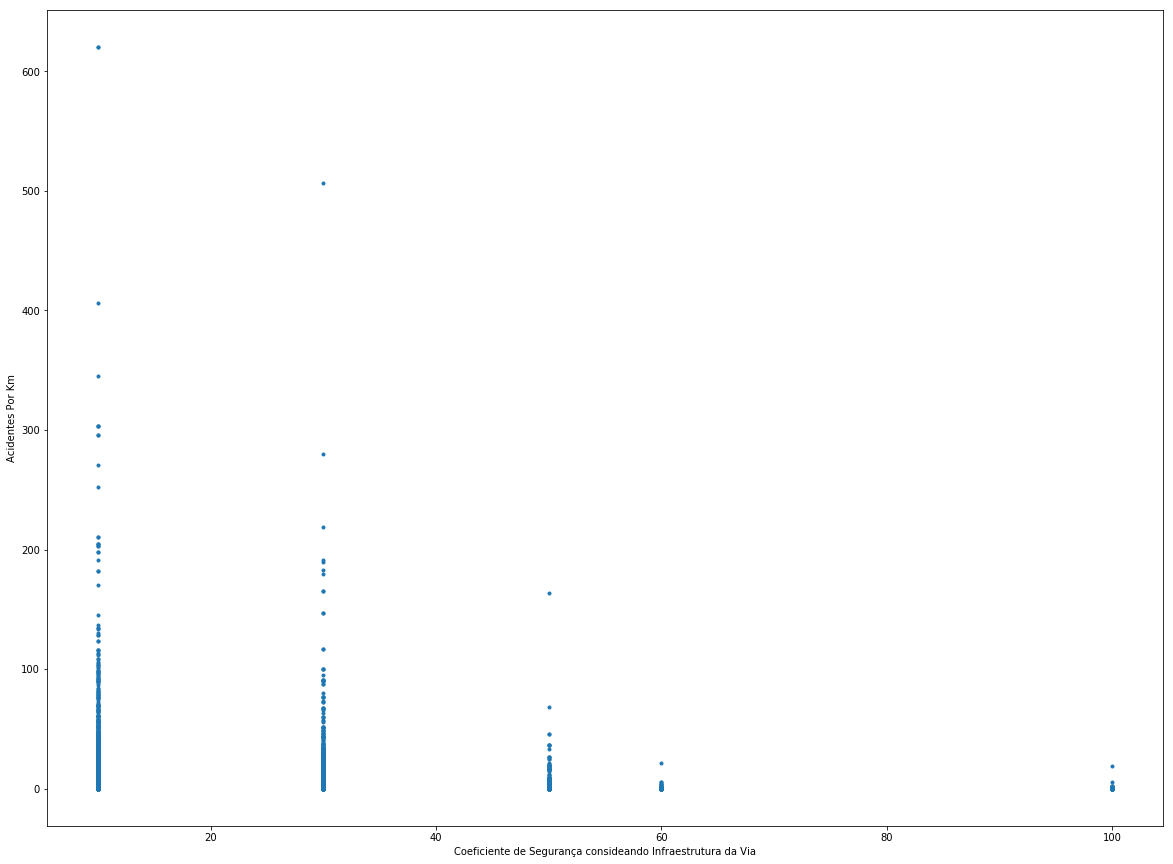

In [6]:
def corr_pearson(x, y):
    """Calcula o coeficiente de correlação de Pearson"""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = corr_pearson(estradas['coef_seg_inf'],estradas['acidentes_por_km'])
print(r)

#GRÁFICO DE CORRELAÇÃO
plt.figure(figsize=(20,15))
corr_gr = plt.plot(estradas['coef_seg_inf'],estradas['acidentes_por_km'], marker = '.', linestyle = 'none')
plt.ylabel('Acidentes Por Km')
plt.xlabel('Coeficiente de Segurança consideando Infraestrutura da Via')

# Show the result
plt.show()

In [ ]:
import folium
estradas['coef_periculosidade'] = (estradas['coef_seg_inf']*0.3 + estradas['acidentes_por_km']*0.7)


m = folium.Map(location=[-12,-60], zoom_start=4)
choropleth = folium.Choropleth(estradas, data=estradas, key_on='feature.properties.OBJECTID',
             columns=['ds_legenda', 'coef_periculosidade'], fill_color='YlOrBr').add_to(m)

folium.LayerControl().add_to(m)

m



In [5]:
estradas.columns

Index(['OBJECTID', 'id_trecho_', 'vl_br', 'sg_uf', 'nm_tipo_tr', 'vl_codigo',
       'ds_local_i', 'ds_local_f', 'vl_km_inic', 'vl_km_fina', 'vl_extensa',
       'ds_sup_fed', 'ds_obra', 'ul', 'ds_coinc', 'ds_tipo_ad', 'ds_ato_leg',
       'est_coinc', 'sup_est_co', 'ds_jurisdi', 'ds_superfi', 'ds_legenda',
       'sg_legenda', 'leg_multim', 'versao_snv', 'id_versao', 'marcador',
       'Shape_Leng', 'Acidentes_no_segmento', 'geometry', 'coef_seg_inf',
       'acidentes_por_km'],
      dtype='object')